<a href="https://colab.research.google.com/github/rohanmad/machine-learning-exercises/blob/main/GradientDescent_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Copyright: © NexStream Technical Institute, LLC**.  
All rights reserved

#**PART 1**:  Gradient Descent with Simple Linear Regression
In this project, you will generate a Simple Linear Regression model using gradient descent to minimize the cost function of the sum of squared errors.  You will compare the coefficients computed directly for the model presented in the Linear Regression Project in a previous unit, then you will recalculate the coefficients using the gradient descent cost minimization technique.

Please reference the video lectures on Gradient Descent, and Simple Linear Regression for a description of this example and the main functions you will need in the implementation.
Please complete the following steps in your Colab Script.  The reference script below provides template code and hints to help with each step.  You will be turning in code and screenshots of your console output in an accompanying assignment.


-  **Step 1**:  
Calculate the coefficients for a simple linear regression model using the following equations:  (NOTE, you may NOT use any machine learning library models for this step - you must calculate the parameters use the equations shown).  
Normalize the dataset using the min and max of each of the variables (min/max of the X's and min/max of the y's), then use the equation shown to normalize each of the values in the columns:
          X_normalized = (X - Xmin)/(Xmax - Xmin)
          y_normalized = (y - ymin)/(ymax - ymin)
 The equations used to calculate the gradient are the partial derivatives of the cost function with respect to b0 and b1.  

$$\hat y = b_0+b_1x_1$$  
$$b_1=\frac {\sum
(x_n-\bar x)(y_n-\bar y)} {\sum
(x_n-\bar x)^2} $$  
$$b_0=\bar y-b_1\bar x$$  

-  **Step 2**:  
Write a function that implements gradient descent from scratch (i.e. you may not call any library functions) to generate the linear regression equation coefficients by minimizing the cost function.
Here we use the Sum of Squared Errors (SSE) cost function where n is the number of samples in the dataset, y is the dependent variable in the dataset, $b_0$ is the y-intercept for the linear equation, $b_1$ is the slope of the linear equation, and $x_1$ is the independent variable.

$$SSE = \frac{1}{n}\sum(y - \hat y)^2 = \frac{1}{n}\sum(y - (b_0+b_1x_1))^2$$  

           API:  def gradientDescent(coeffs, X, y, lr, iterations):
           Input: coefficients: array of coefficients (i.e. b0 and b1) initialized to random values
                  X: normalized training dataset independent vars (see hint below)
                  y: normalized training dataset dependent vars (see hint below)
                  lr:  learning rate  
                  iterations: number of iterations to run
           Output: Returns b0_arr, b1_arr, SSE_arr (in this order), where b0_arr, b1_arr, SSE_arr are numpy arrays
                   of the b0, b1 coefficients and sum-of-squared error respectively for each of the iterations performed in your gradient descent loop.

$$\frac{\partial(SSE)}{\partial(b0)} = \frac{1}{n}\cdot 2(y-(b_0+b_1x_1))\cdot -1 = -\frac{2}{n}(y-\hat y) $$

 $$\frac{\partial(SSE)}{\partial(b1)} = \frac{1}{n}\cdot 2(y-(b_0+b_1x_1))\cdot -x_1 = -\frac{2}{n}(y-\hat y)x_1 $$
> Hint:  
 - The following calculations are done over each sample in the training set (i.e. use a for loop).
 - Calc the model equation:  yhat = b0 + b1x
 - Calc the gradient of b0:  sum(-(y-yhat))   
 - Calc the gradient of b1:  sum(-(y-yhat)*X)
 - Update the coefficients:  new coef = old coef + (learning rate)(error)(input).  
    - Update b0 = b0 - (learning rate) * (gradient of b0)  
    - Append calculated b0 to b0 array
    - Update b1 = b1 - (learning rate) * (gradient of b1)
    - Append calculated b1 to b1 array


- **Step 3**:  
Plot the equation of your model from the manual (Step 1) model and gradient descent (Step 2) model on the same graph along with your dataset points.  
Your plot should look something like this for random initial values of b0 and b1 and 50 iterations (note, it may not look exactly as the plot shown as it will be dependent on the initial random values of the coefficients).  The blue line in the graph is the equation with directly computed coefficients (Step 1), while the red line represents the coefficients calculated by minimizine the cost function with Gradient Descent (Step 2).  Also note that the plotted dataset has been normalized.

![alt text](https://docs.google.com/uc?export=download&id=1F5mxjjzqnuNC9mZNsJwXcHVDcN6TXKgw)


- **Step 4**:  
Experiment with different numbers of iterations to see how your gradient descent model changes compared to that of manual model.   You should observe an improvement with increased number of iterations such the two techniques converge with higher numbers of iterations. (i.e. the lines should coincide). Print out the the minimum number of iterations, values of your coefficients, and SSE for the line that visually is closest to the direct coefficients method (you should be able to find a number of iterations that basically overlays the two prediction lines). Note that we want to find a minimum number of iterations that also provides a minimized cost.


- **Step 5**:  
Plot on a 3D graph your coefficients (b0 and b1), on x and y axes respectively, and SSE (Sum of Square Errors) on the z-axis.  Your plot should should the SSE converging to a minimum as shown in the figure below.  Note your graph will not look exactly as the plot shown as it will be depending on the initial random values of the coefficients and the number of iterations.  

![alt text](https://docs.google.com/uc?export=download&id=1buL6OC40DMZJduCQIh66PDBOxYbRieN3)


- **Step 6**:  
Calculate the performance for both techniques (Step 2, Step 3) using the r-squared score metric.  
Hint: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html  
Why does the R-square score for the direct calculated coefficients remain constant, and why is it relatively low?  
Why does the R-square score change from run to run for the gradient descent calculated coefficients?



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import random
from sklearn.metrics import r2_score


#Input Parameters
Age = np.array([43,21,25,42,57,59,35,15,55,50,65,10,45,35])
Glucose = np.array([99,65,79,75,87,81,80,80,90,70,95,67,90,82])


#Step 1:  Create a function which MANALLY (using the equations) calculates the
#         coefficients for a simple linear regression model, then plot the calculated
#         regression line on top of the dataset.
#         Your function must input numpy arrays for the x and y variables and return b0 and b1.
#         Your function MUST use equations shown in the text cell above.
#         Note - you may not use a machine learning library model for this step.
#         Note - you may (should) use the function you created in the Linear Prediction Project.
#         Note - normalize your data using the min/max method before calculating the coefficients.

#Normalize the data using the following min/max method:
#Normalized Sample = (Sample - Sample.min)/(Sample.max - Sample.min)
# YOUR CODE HERE...

plt.scatter(Age,Glucose)

#Write a function to calculate the Linear Regression coefficients manually.
#Use the function in your previous project on simple linear regression.
def simpleLRcoeffsManual(X, Y):
# YOUR CODE HERE...


#Print out your coefficients, prediction (yhat or ypred), and the SSE
# YOUR CODE HERE...

#Plot the data and prediction line for the manual calculation
# YOUR CODE HERE...


#Step 2:  Write a function that implements gradient descent to minimize the cost function.
#         where the cost function is sum-of-square error (SSE) = 1/n*sum(y - yhat)^2 = 1/n*sum(y-(b0+b1*X))^2
#         Inputs:  coeffs:  array of coefficients b0 and b1 initialized to random values
#                  X:  dataset normalized independent variable values
#                  y:  dataset normalized dependent variable values
#                  lr: learning rate
#                  iterations:  number of iterations
#         Outputs: Returns b0_arr, b1_arr, SSE_arr (in this order)
#         def gradientDescent(coeffs, X, y, lr, iterations):
#
def gradientDescent(coeffs, X, y, lr, iterations):
# YOUR CODE HERE...


# Step 3: Plot the equation of your model from the manual (Step 1) model and gradient descent (Step 2) model
#         on the same graph along with your dataset points.
#         Note, Use the normalized dataset.
# YOUR CODE HERE...


# Step 4:  Experiment with different numbers of iterations to see how your gradient descent
#          model changes compared to that of manual model.   You should observe an improvement
#          with increased number of iterations such the two techniques converge with higher numbers
#          of iterations. (i.e. the lines should coincide). Print out the the minimum number of
#          iterations, values of your coefficients, and SSE for the line that visually is closest to the
#          direct coefficients method.
# YOUR CODE HERE...


# Step 5: Plot on a 3D graph your coefficients (b0 and b1), on x and y axes respectively,
#         and SSE (Sum of Square Errors) on the z-axis.  Your plot should should the
#         SSE converging to a minimum as shown in the figure below.  Note your graph will
#         not look exactly as the plot shown as it will be depending on the initial
#         random values of the coefficients and the number of iterations.
#         Hint: https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html
# YOUR CODE HERE...



#Step 6:  Calculate the performance for both techniques (Step 2, Step 3) using the r-squared score metric.
# YOUR CODE HERE...


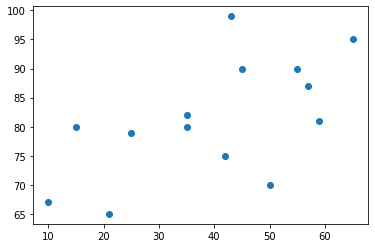

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import random
from sklearn.metrics import r2_score


#Input Parameters
Age = np.array([43,21,25,42,57,59,35,15,55,50,65,10,45,35])
Glucose = np.array([99,65,79,75,87,81,80,80,90,70,95,67,90,82])

plt.scatter(Age,Glucose)

#**PART 2**:  Gradient Descent with Multiple Linear Regression
In Part 2, you will train a model as in Part 1, but this time with multiple independent variables.  You will create a generic function to train your model using gradient descent to minimize the cost for varying number of independent variables and a single dependent variable.  You will use the dataset from the previous unit on Multiple Linear regression to train your models.

Please reference the video lectures on Gradient Descent, and Multiple Linear Regression for a description the main functions you will need in the implementation.
Please complete the following steps in your Colab Script below.  The reference script below provides template code and hints to help with each step.  You will be turning in code and screenshots of your console output in an accompanying assignment.  

Recall from Part 1, we used the SSE (sum of squared errors) as our cost function then computed the partial derivatives with respect to each of the coefficients.  We will do the same here, but in a more generic form to support 'n' independent variables.  Recall the cost function we used in Part 1 was the Sum of Squared Errors (SSE) for the simple linear regression model.  Here we expand the cost function for multiple independent variables:

$$SSE = \frac{1}{n}\sum(y - \hat y)^2 = \frac{1}{n}\sum(y - (b_0+b_1x_1+b_2x_2+...+b_nx_m))^2$$  
The gradients of each coefficient are defined as the partial derivatives of the cost function with respect to each of the coefficients.  

 $$\frac{\partial(SSE)}{\partial(b_0)} = \frac{1}{n}\cdot 2(y-(b_0+b_1x_1+...+b_nx_n))\cdot -1 = -(y-\hat y) $$

 $$\frac{\partial(SSE)}{\partial(b_1)} = \frac{1}{n}\cdot 2(y-(b_0+b_1x_1+...+b_nx_n))\cdot -x_1 = -(y-\hat y)x_1 $$

 $$\frac{\partial(SSE)}{\partial(b_2)} = \frac{1}{n}\cdot 2(y-(b_0+b_1x_1+...+b_nx_n))\cdot -x_2 = -(y-\hat y)x_2 $$
            <center>**. . .** </center>
            
 $$\frac{\partial(SSE)}{\partial(b_n)} = \frac{1}{n}\cdot 2(y-(b_0+b_1x_1+...+b_nx_n))\cdot -x_n = -(y-\hat y)x_m $$

Note that the $b_0$ coefficient is computed slightly different from the remaining coefficients in that all but the $b_0$ coefficient contains its corresponding independent variable term.


**Step 1**:   
Read in the dataset into Pandas dataframe.  Create a numpy array X by extracting the appropriate column data for the following cases:
-  Case 1:  Interest_Rate, Stock_Index_Price
-  Case 2:  Interest_Rate, GDP, Stock_Index_Price
-  Case 3:  Interest_Rate, Unemployment_Rate, Stock_Index_Price  
Note, we include the dependent variable 'Stock_Index_Price' in the X as we'll use it in the training function.  
Create a numpy array y with the independent variable: Stock_Index_Price.  

**Step 2**:  
Write a function to normalize the numpy arrays created in Step 1.  
      Normalize cases 1,2,3 for your X and y numpy arrays.  
>>      def normalize_dataset(dataset):  

**Step 3**:  
Write a function that implements gradient descent to minimize the cost function, where the cost function is sum-of-square error as defined above.  
>>     def gradientDescent(coeffs, X, lr, iterations):  
>>     Inputs:  coeffs:  array of coefficients b0 and b1 initialized to random values   
              X:  dataset normalized independent variable values where:  
                  x1 is formatted in the first column of the X numpy array  
                  x2 is formatted in the second column of the X numpy array  
                  xn is formatted in the nth column of the X numpy array  
                  y is formmatted in the last column of the X numpy array  
              y:  dataset normalized dependent variable values  
              Note, that y is contained in the last column of the X array  
                    AND separately in the numpy array from Step 2  
              lr: learning rate  
              iterations:  number of iterations  
>>     Outputs: Returns coeff, SSE_arr (in this order)  
             Note, the SSE_arr is not required but you should at least return the last SSE.  

**Step 4**:  
Create (or reuse from the previous linear regression projects) a
         function to perform multiple linear regression using sklearn.  
         Run cases 1,2,3 with the Gradient descent based regression
         and with the sklearn based multiple linear regression.  
         Compare the results from each of your test cases.


In [ ]:
from pandas import DataFrame
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np
import random


Stock_Market = {'Year':[2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,\
                         2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,\
                         2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],\
                'Month':[12,11,10,9,8,7,6,5,4,3,2,1, 12,11,10,9,8,7,6,5,4,3,2,1, 12,11,10,9,8,7,6,5,4,3,2,1],\
                'Interest_Rate':[2.73, 2.7,  2.63, 2.4,  2.37, 2.77, 2.53, 2.23, 2.67, 2.6,  2.43, 2.2,  2.5,  2.47,\
                                 2.03, 2.33, 2.3,  2.57, 2.27, 2.1,  2.,   2.13, 2.07, 2.17, 1.87, 1.73, 1.67, 1.97,\
                                 1.93, 1.9,  1.83, 1.8,  1.77, 1.6,  1.7,  1.63],\
                'Unemployment_Rate':[5.8,  5.75, 5.68, 5.65, 5.63, 5.62, 5.72, 5.83, 5.78, 5.73, 5.7,  5.6,  6.08, 5.67,\
                                     5.97, 5.95, 5.88, 5.87, 5.85, 5.82, 5.77, 5.98, 5.93, 5.92, 5.9,  6.07, 6.05, 6.,\
                                     6.03, 6.02, 6.15, 6.18, 6.17, 6.12, 6.13, 6.1],\
                'GDP':[22.2, 20.6, 21.7, 19.7, 22.1, 19.5, 18.7, 22.,  21.6, 19.4, 21.9, 21.8,\
                       21.5, 21.2, 21.1, 21.,  20.5, 21.4, 20.9, 20.4, 20.,  20.8, 20.3, 20.1,\
                       19.8, 19.6, 20.2, 19.3, 20.7, 18.9, 21.3, 19.2, 19.,  18.8, 19.9, 19.1],\
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1230,1195,1175,1167,1159,\
                                      1147,1130,1075,1071,1065,1058,1051,1049,1043, 984, 976, 971,\
                                       968, 965, 958, 949, 943, 922, 884, 876, 866, 822, 719, 704]
                }


#Step 1:  Read in the dataset into Pandas dataframe
#         Create a numpy array X by extracting the appropriate column data for the following cases:
#         Case 1:  Interest_Rate, Stock_Index_Price
#         Case 2:  Interest_Rate, GDP, Stock_Index_Price
#         Case 3:  Interest_Rate, Unemployment_Rate, Stock_Index_Price
#         Note, we include the dependent variable 'Stock_Index_Price' in the X as we'll use it in the training function.
#         Create a numpy array y with the independent variable: Stock_Index_Price
#         Hint: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
#         Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html
#YOUR CODE HERE

pd.DataFrame.from_dict(Stock_Market)

pd.DataFrame({"Interest_Rate": [1, 2], "Stock_Index_Price": [3, 4]}).to_numpy()

#Step 2:  Write a function to normalize the numpy arrays created in Step 1.
#         Normalize cases 1,2,3 for your X and y numpy arrays.
#         def normalize_dataset(dataset):
def normalize_dataset(dataset):
#YOUR CODE HERE...


#Step 3:  Write a function that implements gradient descent to minimize the cost function.
#         where the cost function is sum-of-square error:
#         SSE = 1/n*sum(y - yhat)^2 = 1/n*sum(y-(b0+b1*X))^2
#         where X is comprised of x1 (indep var 1), x2 (indep var 2), ... xn (indep var n)
#         Inputs:  coeffs:  array of coefficients b0 and b1 initialized to random values
#                  X:  dataset normalized independent variable values where:
#                      x1 is formatted in the first column of the X numpy array
#                      x2 is formatted in the second column of the X numpy array
#                      xn is formatted in the nth column of the X numpy array
#                      y is formmatted in the last column of the X numpy array
#                  y:  dataset normalized dependent variable values
#                      Note, that y is contained in the last column of the X array
#                      AND separately in the numpy array from Step 2
#                  lr: learning rate
#                  iterations:  number of iterations
#         Outputs: Returns coeff, SSE_arr (in this order)
#                  Note, the SSE_arr is not required but you should at least return the last SSE
#         def gradientDescent(coeffs, X, lr, iterations):

def gradientDescent_train(coeffs, X, lr, iterations):
# YOUR CODE HERE... (see the inline hints)
# Create a numpy array to store the gradients for each of the coeffs (b0, b1, ... bn)
# where size = number of indep vars (columns) in the X data + 1
# Note, we include num of indep vars + 1 to include b0 = num of cols in X since y is in the dataset

# Create an empty numpy array to store the SSE

# Loop over 'iterations'
#   Init yhat = b0
#   Loop over number of indep vars in X
#   Note, need to adjust the loop counter to exclude the last col since it will contain the y data
#     Update yhat = b0 + b1*x1 + b2x2 + ... bnxn
#     Do this for all rows in x1, x2, etc.
#     Hint:  use numpy array slicing for x to include all rows
#   End Loop over number of indep vars in X

#   Compute SSE per the equation in the notes
#   Note, make the 1/m term generic, based on the number of samples in X
#   Hint: use numpy 'sum' to sum all the squared error terms

#   Compute the gradient of b0 per the equation in the notes
#   Note, we cannot do this in a loop since it excludes any indep variable

#   Loop over number of coefficients - 1 (i.e. b1, b2, ..., bn)
#   Note, need to adjust the loop counter with -1 since already computed b0
#     Compute the gradient of b1, b2, ... bn per the equation in the notes

#   Update the coefficients where each coeff = old coeff - lr*(grad for that coeff)
#   Hint: Loop over number of indep vars in X
#     SSE_arr = np.append(SSE_arr, SSE)
# Return coeffs, SSE_arr
#

#YOUR CODE HERE...
# Test cases - see reference code below
'''DIM = 500
CASE = 3
X_case1 = df[['Interest_Rate','Stock_Index_Price']].to_numpy()
X_case2 = df[['Interest_Rate','GDP','Stock_Index_Price']].to_numpy()
X_case3 = df[['Interest_Rate','Unemployment_Rate','Stock_Index_Price']].to_numpy()
normalize_dataset(X_case1)
normalize_dataset(X_case2)
normalize_dataset(X_case3)
Y_case1 = X_case1[:,-1]
Y_case2 = X_case2[:,-1]
Y_case3 = X_case3[:,-1]
initial_b = np.array([random.random(),random.random(),random.random()])

if CASE == 1:
  coef, SSE = gradientDescent_train(initial_b, X_case1, 0.01, DIM)
  ypred = coef[0] + coef[1]*X_case1[:,0]
  print('Score gradient descent calculated coeffs:', r2_score(Y_case1, ypred ))
elif CASE ==2:
  coef, SSE = gradientDescent_train(initial_b, X_case2, 0.01, DIM)
  ypred = coef[0] + coef[1]*X_case2[:,0] + coef[2]*X_case2[:,1]
  print('Score gradient descent calculated coeffs:', r2_score(Y_case2, ypred ))
else:
  coef, SSE = gradientDescent_train(initial_b, X_case3, 0.01, DIM)
  ypred = coef[0] + coef[1]*X_case3[:,0] + coef[2]*X_case3[:,1]
  print('Score gradient descent calculated coeffs:', r2_score(Y_case3, ypred ))

print('Start, Stop SSE:', SSE[0], SSE[DIM-1])
'''


#Step 4:  Create (or reuse from the previous linear regression projects) a
#         function to perform multiple linear regression using sklearn.
#         Run cases 1,2,3 with the Gradient descent based regression
#         and with the sklearn based multiple linear regression.
#         Compare the results from each.
#YOUR CODE HERE


In [ ]:
import pandas as pd
from pandas import DataFrame
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np
import random


Stock_Market = {'Year':[2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,\
                         2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,\
                         2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],\
                'Month':[12,11,10,9,8,7,6,5,4,3,2,1, 12,11,10,9,8,7,6,5,4,3,2,1, 12,11,10,9,8,7,6,5,4,3,2,1],\
                'Interest_Rate':[2.73, 2.7,  2.63, 2.4,  2.37, 2.77, 2.53, 2.23, 2.67, 2.6,  2.43, 2.2,  2.5,  2.47,\
                                 2.03, 2.33, 2.3,  2.57, 2.27, 2.1,  2.,   2.13, 2.07, 2.17, 1.87, 1.73, 1.67, 1.97,\
                                 1.93, 1.9,  1.83, 1.8,  1.77, 1.6,  1.7,  1.63],\
                'Unemployment_Rate':[5.8,  5.75, 5.68, 5.65, 5.63, 5.62, 5.72, 5.83, 5.78, 5.73, 5.7,  5.6,  6.08, 5.67,\
                                     5.97, 5.95, 5.88, 5.87, 5.85, 5.82, 5.77, 5.98, 5.93, 5.92, 5.9,  6.07, 6.05, 6.,\
                                     6.03, 6.02, 6.15, 6.18, 6.17, 6.12, 6.13, 6.1],\
                'GDP':[22.2, 20.6, 21.7, 19.7, 22.1, 19.5, 18.7, 22.,  21.6, 19.4, 21.9, 21.8,\
                       21.5, 21.2, 21.1, 21.,  20.5, 21.4, 20.9, 20.4, 20.,  20.8, 20.3, 20.1,\
                       19.8, 19.6, 20.2, 19.3, 20.7, 18.9, 21.3, 19.2, 19.,  18.8, 19.9, 19.1],\
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1230,1195,1175,1167,1159,\
                                      1147,1130,1075,1071,1065,1058,1051,1049,1043, 984, 976, 971,\
                                       968, 965, 958, 949, 943, 922, 884, 876, 866, 822, 719, 704]
                }


pd.DataFrame.from_dict(Stock_Market)

pd.DataFrame({"Interest_Rate": [1, 2], "Stock_Index_Price": [3, 4]}).to_numpy()

array([[1, 3],
       [2, 4]])